In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\hp\WorldQuantum\US-Segmentaion\US-Seg1.csv")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


## mask to subset create df to only households that have been turned down or feared being turned down for credit ("TURNFEAR" == 1). Assign this subset to the variable name df_fear.

In [4]:
mask = df["TURNFEAR"] == 1
mask.sum()

4623

In [5]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


## Age groups

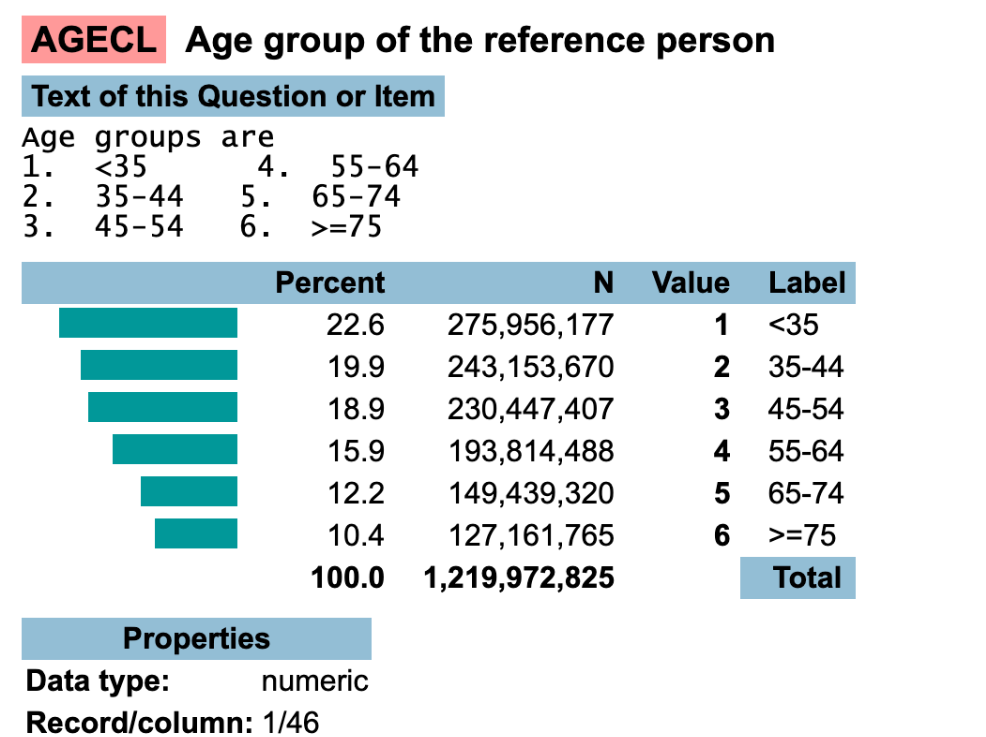

In [6]:
from IPython.display import Image

# Path to your image
image_path = r"C:\Users\hp\WorldQuantum\US-Segmentaion\Screenshot 2024-10-07 222108.png"

# Display the image
Image(filename=image_path)

In [7]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [8]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

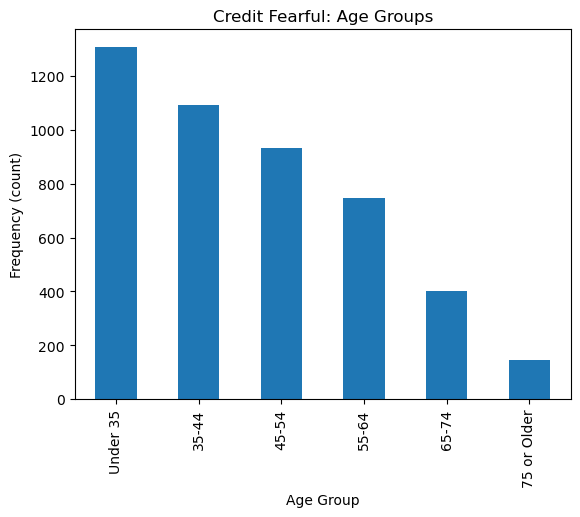

In [9]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful: Age Groups"
);

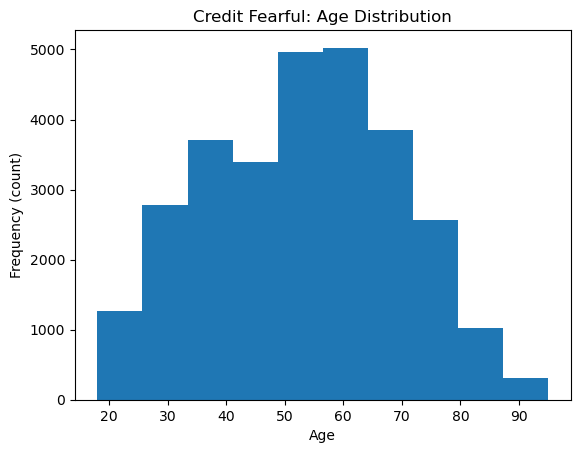

In [10]:
plt.hist(df["AGE"])
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful: Age Distribution");

## Race

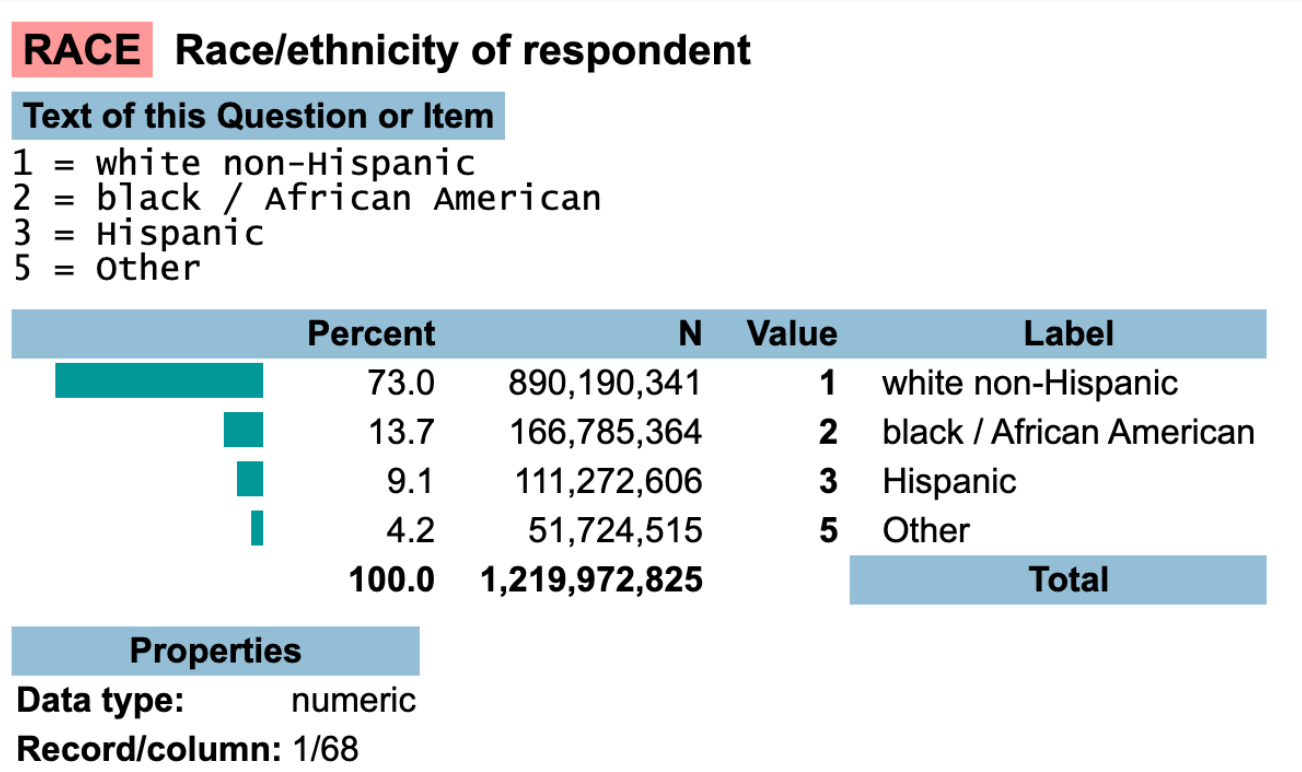

In [11]:
from IPython.display import Image

# Path to your image
image_path = r"C:\Users\hp\WorldQuantum\US-Segmentaion\Screenshot 2024-10-07 230818.png"
# Display the image
Image(filename=image_path)

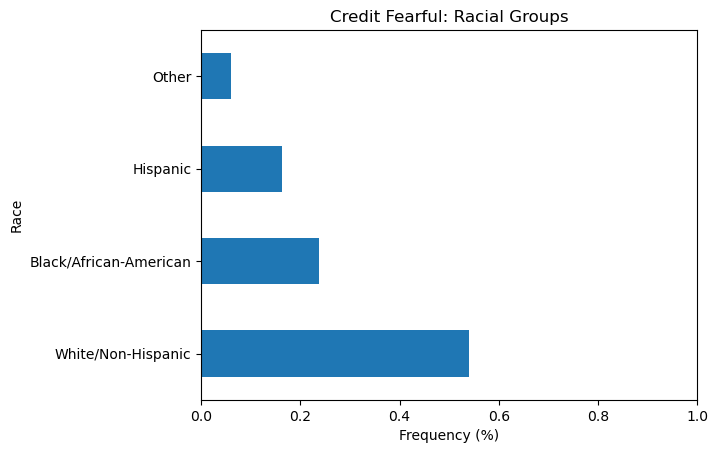

In [12]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

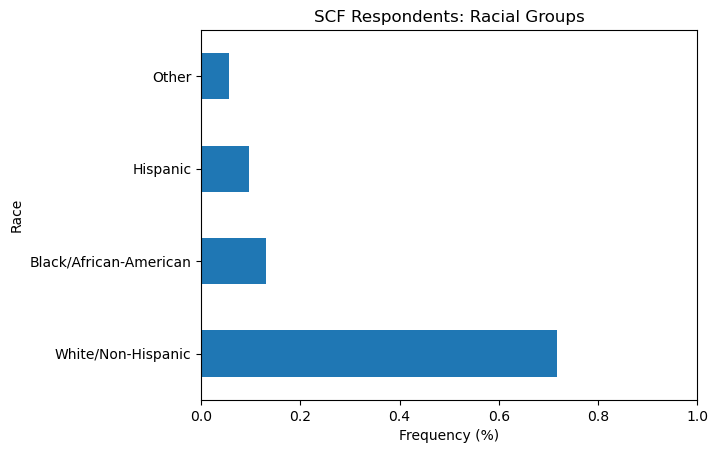

In [13]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

## Income

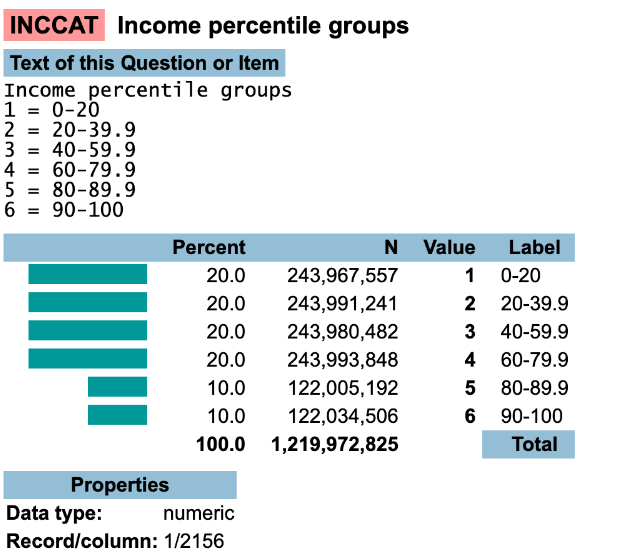

In [14]:
from IPython.display import Image

# Path to your image
image_path = r"C:\Users\hp\WorldQuantum\US-Segmentaion\Screenshot 2024-10-08 001936.png"
# Display the image
Image(filename=image_path)

In [17]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = ( 
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
             
)
print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


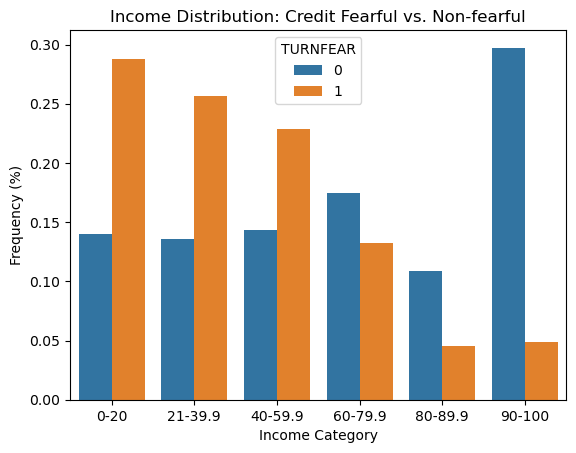

In [18]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

# Assets

In [19]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779253


In [21]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.583287973597916


In [22]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [23]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


# Education

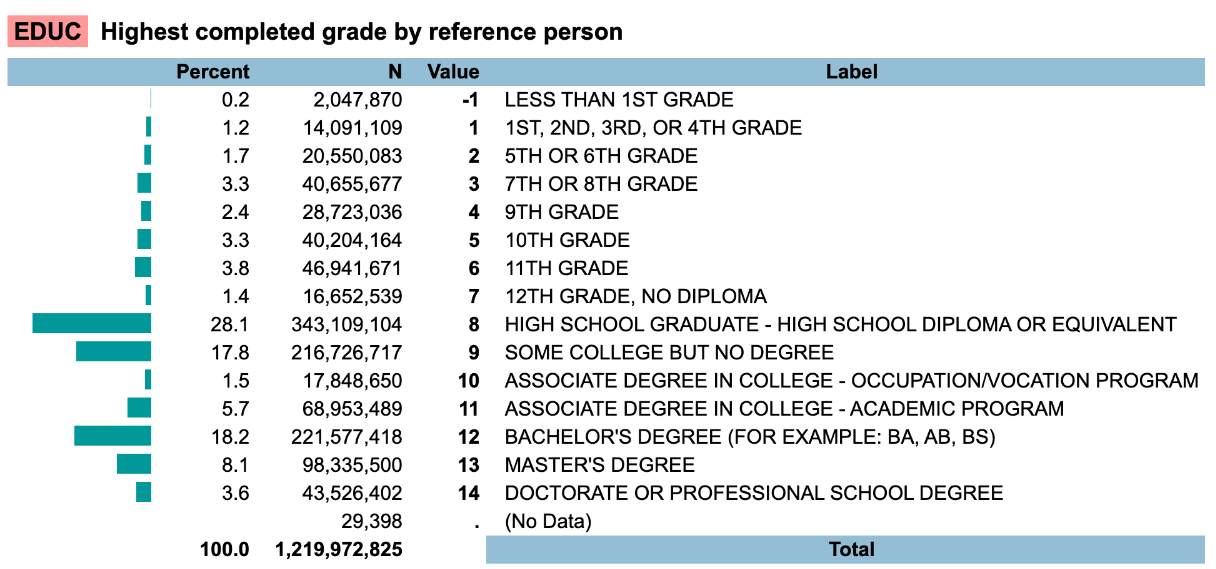

In [25]:
from IPython.display import Image

# Path to your image
image_path = r"C:\Users\hp\WorldQuantum\US-Segmentaion\Screenshot 2024-10-18 235004.png"
# Display the image
Image(filename=image_path)

In [26]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ

df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117
5,0,10,0.051150
6,0,11,0.046492
7,0,7,0.019578
8,0,4,0.012035
9,0,6,0.011953


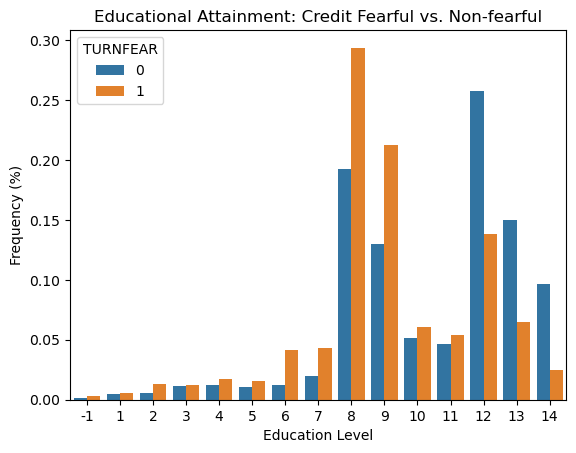

In [27]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

# Debt

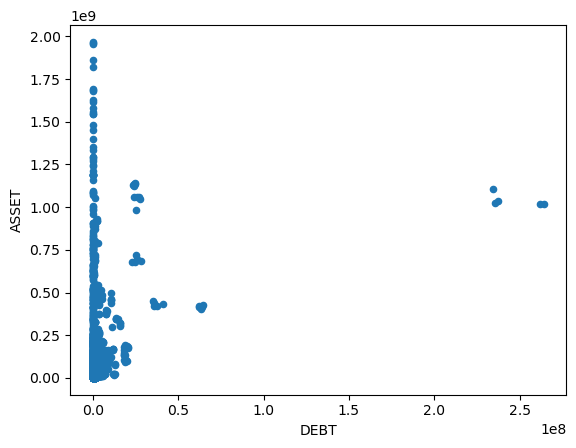

In [28]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT", y="ASSET");

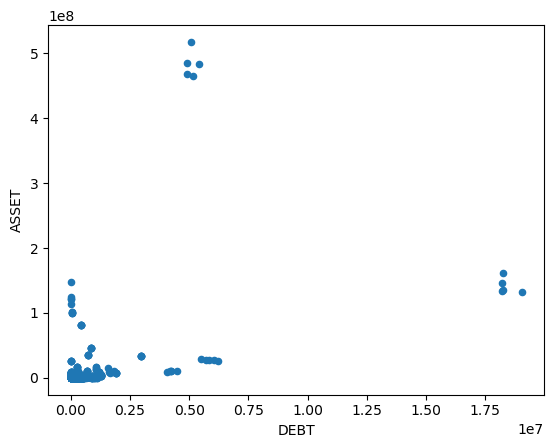

In [29]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="ASSET");

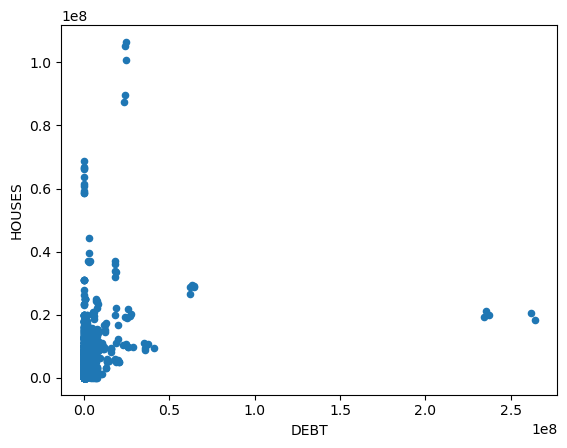

In [30]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y="HOUSES");

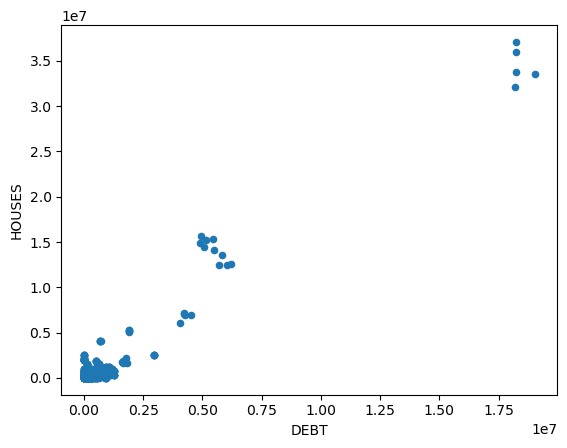

In [31]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="HOUSES");